# Linear Classification

Let us pick up from where we have left off. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("data/synth_covid.csv")
dataset

,blood_pressure,lung_capacity,body_temperature,has_covid
0,132.894691,6.931665,39.270112,0
1,117.128239,6.715135,37.005833,1
2,108.982006,6.580677,38.079465,0
3,112.337762,5.482720,37.662576,0
4,113.165263,6.664360,36.922810,1
...,...,...,...,...
995,116.208860,7.408413,37.088040,0
996,108.632769,6.854598,36.226869,1
997,137.732933,3.548004,35.543415,0
998,108.552490,2.931925,37.007822,0


Do you have any null values? This data is pretty clean

In [4]:
dataset.isnull().values.any()

False

In [18]:
dataset.isnull().values.mean()

0.0

percentage of people have covid

In [16]:
dataset['has_covid'].value_counts(normalize=True)

0    0.636
1    0.364
Name: has_covid, dtype: float64

plot a pie chart with percentages

<AxesSubplot:ylabel='has_covid'>

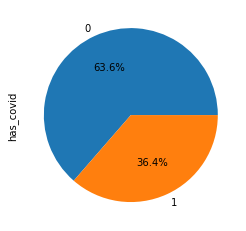

In [17]:
dataset['has_covid'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='has_covid'>

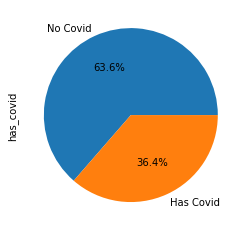

In [19]:
dataset['has_covid'].value_counts(normalize=True).plot.pie(labels=['No Covid', 'Has Covid'], autopct='%1.1f%%')

In [21]:
dataset.columns

Index(['blood_pressure', 'lung_capacity', 'body_temperature', 'has_covid'], dtype='object')

In [22]:
y=dataset['has_covid']
X=dataset[['blood_pressure','lung_capacity','body_temperature']]


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset[['blood_pressure','lung_capacity','body_temperature']], 
                                                    dataset['has_covid'], test_size=0.2)

In [27]:
#I missed something here

In [28]:
y_train

983    1
228    0
848    0
231    1
193    1
      ..
110    0
993    0
299    1
851    0
14     1
Name: has_covid, Length: 800, dtype: int64

To compare the models, we will use **accuracy score**. 

To read more about different available metrics for quantifying the quality of predictions in scikit-learn library, read [this](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics). 

In [7]:
losses = {}

## Logistic Regression for Classification:

 - If you use linear regression in classification setting, the predicted y will be in continuous variables and not guaranteed to be between 0 and 1
 - Since we want to ensure that the predicted y is in between 0 and 1 to represent probability of "has_covid", we will use logistic regression
 - Further reading: [Difference between linear regression and logistic classifier](https://www.analyticsvidhya.com/blog/2020/12/beginners-take-how-logistic-regression-is-related-to-linear-regression/#:~:text=The%20Differences%20between%20Linear%20Regression,Logistic%20regression%20provides%20discreet%20output.)

Model Creation Stage = Training the model

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Prediction of results i.e. Using the trained model above, predict the results on the test set.

In [30]:
lr.predict(X_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0])

We're getting the probability of having covid, which is the second column!

In [39]:
lr.predict_proba(X_test)[:,1]

array([0.56328777, 0.21960765, 0.31287407, 0.22380973, 0.40829331,
       0.33213483, 0.11187698, 0.36957407, 0.31033998, 0.52955739,
       0.32865776, 0.74641865, 0.55155994, 0.35047475, 0.20310627,
       0.61790695, 0.54000137, 0.28095735, 0.25352624, 0.32862377,
       0.1362622 , 0.5241586 , 0.59428597, 0.28936378, 0.12319131,
       0.09415117, 0.06479168, 0.11877433, 0.43052478, 0.58355088,
       0.19549575, 0.4089297 , 0.47225298, 0.1147812 , 0.23468788,
       0.72283793, 0.27979959, 0.28304916, 0.6545603 , 0.51671324,
       0.55316483, 0.24046314, 0.41534601, 0.51727518, 0.50933009,
       0.48004751, 0.14155502, 0.11839792, 0.38889308, 0.63455549,
       0.51583609, 0.05731099, 0.16859597, 0.13395508, 0.66854736,
       0.33841795, 0.28287363, 0.31419063, 0.66749935, 0.48094735,
       0.13423125, 0.42591442, 0.57953826, 0.16833888, 0.6650687 ,
       0.36412608, 0.0778163 , 0.43544153, 0.15575588, 0.7375027 ,
       0.10427555, 0.21696564, 0.05617944, 0.36257938, 0.28972

/Users/sarabernard/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='blood_pressure'>

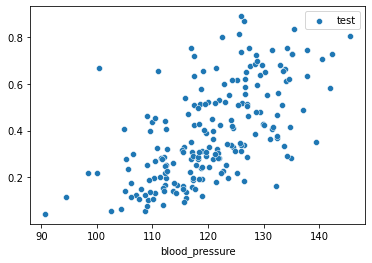

In [32]:
sns.scatterplot(X_test['blood_pressure'], lr.predict_proba(X_test)[:,1], label='test')


In [11]:
from sklearn.metrics import accuracy_score
losses['Logistic'] = accuracy_score(y_test, lr.predict(X_test))
print(losses)

{'Logistic': 0.695}


In [12]:
from sklearn.metrics import roc_auc_score
losses['Logistic'] = roc_auc_score(y_test, lr.predict(X_test))
print(losses)

{'Logistic': 0.6321650835244023}


Reference:
- [User Guide for scikit-learn](https://scikit-learn.org/stable/user_guide.html)